# Pandas Test - Real life Exercise

In [10]:
import pandas as pd

For visualizations:

In [11]:
import cufflinks as cf; cf.go_offline()
import plotly_express as px

## About the data

The data you are about to load is coming from an Ad recommentation system of the company InBrain. InBrain is a adTech company and specalize in next-level ad recommendation.  
The company has two major products - one giving high quality recommendation while the other is giving an highly yielding recommendation. Inbrain custormers are sending requests, asking for either of the products. 

Once a week, the company is doing an internal quality assements, and sends a sample of its traffic requests to external annotation process, in which the annotators are trained to manually decided whether the recommended Ad is a succes or not. The data contains information about the ad (**ad_id**), the sampled week (**week_id**), the requester company (**requester**), the region of operation (**region**), the recommendation type (Quality/Yield, **recommendation_type**) and the recommendation provider algorithm (**rec_provider**). The annotators are marking whether the recommendation is meeting the Quality/Yield standards (**is_success**) and whether or not the recommendation is severly defected (**is_sever**)

See a sample below:

In [12]:
ad_recs_annotated = pd.read_csv('data/Final assigment/ad_annotations.csv')
ad_recs_annotated.sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
157047,2021-week_43,AD088K888,Sensor Tower,US,yes,NaN,Qality,DNNQ
215481,2021-week_47,AD07N88FV8,Extreme DA,US,yes,NaN,Yield,RNNY
317518,2022-week_04,AD07CGPK9W,Search Million Culture,GB,yes,NaN,Qality,DNNQ
106652,2021-week_40,AD08L89VM8,"OpenDesks, Inc.",IN,yes,NaN,Yield,UserPopY
295357,2022-week_02,AD008XON6T,RelayFoods,JP,yes,NaN,Qality,DNNQ


In [13]:
most_pop_ad = ad_recs_annotated.ad_id.value_counts().idxmax()


In [14]:
q = f'ad_id == "{most_pop_ad}"'
q

'ad_id == "AD07PFFMP9"'

In [15]:
ad_recs_annotated.query("ad_id == 'AD09H6SK6C'& is_success=='no'")

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
372143,2022-week_52,AD09H6SK6C,Extreme DA,US,no,False,Yield,RuleBasedY


Your job, as the new and only data scientist of the company, is to get familiar with the the data, show week-over-week trends and produce insightfull graphs as a preparation to a full blown BI dashboard.

## Questions

### Data Modifications

1. Add a column with the sample year
1. Add a column with the sample quarter (google how to)
1. Add a new success column with values 1 and 0 for yes and no 
1. Are there any NaNs in the is_sever column? Count how many and create a new column with NaNs filled as False. Check that indeed the new column contaion no NaNs. 
1. Capitlize (first letter only) the is_success column (Inplace)

### Q1

In [16]:
#ADD YEAR 
type(ad_recs_annotated)
ad_recs_annotated['year']=ad_recs_annotated['week_id'].apply(lambda x: x.split('-')[0])
ad_recs_annotated

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year
0,2021-week_33,AD0088VOS,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,yes,NaN,Yield,DNNY,2021
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021
3,2021-week_33,AD89608808,Search Million Culture,DE,yes,NaN,Qality,BooksQ,2021
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021
...,...,...,...,...,...,...,...,...,...
373783,2022-week_52,AD08KQ8GDG,Extreme DA,US,yes,NaN,Yield,DNNY,2022
373784,2022-week_52,AD07C8XSMN,Fancy,US,yes,NaN,Qality,RNNQ,2022
373785,2022-week_52,AD096LRR88,Extreme DA,US,yes,NaN,Yield,DNNY,2022
373786,2022-week_52,AD08FWNFDO,RelayFoods,US,yes,NaN,Qality,DNNQ,2022


### Q2

In [17]:
#ad_recs_annotated['week']=
ad_recs_annotated['week']=ad_recs_annotated['week_id'].apply(lambda x: x.split('_')[1])
ad_recs_annotated['week']

0         33
1         33
2         33
3         33
4         33
          ..
373783    52
373784    52
373785    52
373786    52
373787    52
Name: week, Length: 373788, dtype: object

### Q3

In [18]:
ad_recs_annotated['success']=ad_recs_annotated['is_success'].apply(lambda x: 1 if x=='yes' else 0)
ad_recs_annotated['success']
ad_recs_annotated['is_success'].apply(lambda x:x is None)


0         False
1         False
2         False
3         False
4         False
          ...  
373783    False
373784    False
373785    False
373786    False
373787    False
Name: is_success, Length: 373788, dtype: bool

In [19]:
[x for x in ad_recs_annotated['is_sever'].value_counts().apply(lambda x:x is None) if x==True]

[]

In [20]:
ad_recs_annotated['is_success'].apply(lambda x: x.capitalize())

0         Yes
1         Yes
2         Yes
3         Yes
4         Yes
         ... 
373783    Yes
373784    Yes
373785    Yes
373786    Yes
373787    Yes
Name: is_success, Length: 373788, dtype: object

### Subset selection

for each question, sub-select the data by using the conditional selection (`[]`) and the `.query` API. Use `.shape` on the subselection to obtain the result.  
For example:
`df.query('some_condition').shape`

1. How many requests are there in US region? 
1. How many **successful** requests are there in US region? 
1. How many **successful** requests are there in US region, on week 52?
1. How many requests where delivered by DNNQ, RNNY and UserPopQ together? 
1. How many requests where delivered by rule based providers? 
1. Select only the requests from 2021 - How many are there? 
1. Select the reqeusts from week 30 to week 40 - How many are there? 
1. Select all the data that comes from the most popular Ad
1. Select all the data that comes from the least popular provider
1. Select the data in which is_sever is None. How big is it? 
1. Select the data in which the requester is a 3 word company
1. Select the data in which the requester is a 3 word company, and the ad_id has the letter 6 in it
1. Select the data in which the requester is a 3 word company, and the multiplication of all the numbers in the ad_id is bigger than 30

### Q1

In [21]:
ad_recs_annotated.query("region =='US'").region.value_counts()
ad_recs_annotated.query("region =='US'").shape

(103846, 11)

### Q2

In [22]:
ad_recs_annotated.query("region =='US'&success==1").shape

(88918, 11)

### Q3

In [23]:
ad_recs_annotated.query("region =='US'&success==1")['week_id'].str.contains('week_52').value_counts()

False    85576
True      3342
Name: week_id, dtype: int64

### Q4

In [24]:
ad_recs_annotated.query("rec_provider =='DNNQ'|rec_provider=='RNNY'|rec_provider=='UserPopQ'").shape

(200093, 11)

### Q5

In [25]:
#DONT KNOW WHAT IS MEAN

### Q6

In [26]:
ad_recs_annotated.query("year=='2021'").shape

(271615, 11)

### Q7

In [27]:
ad_recs_annotated.query("'30' <= week <= '40'")['week'].value_counts().sort_index()

33    14356
34    14371
35    14373
36    14390
37    14392
38    14347
39    14416
40    14406
Name: week, dtype: int64

In [28]:
ad_recs_annotated.query("'30' <= week <= '40'")['week'].value_counts()

39    14416
40    14406
37    14392
36    14390
35    14373
34    14371
33    14356
38    14347
Name: week, dtype: int64

In [29]:
mostPopolarAdId = ad_recs_annotated['ad_id'].value_counts().sort_values(ascending=False).index[0]
mostPopolarAdId2 = ad_recs_annotated.ad_id.value_counts().idxmax()
print(mostPopolarAdId,mostPopolarAdId2)

AD07PFFMP9 AD07PFFMP9


In [30]:
ad_recs_annotated.query("ad_id=='AD07PFFMP9'") 
ad_recs_annotated.query("{0}=='{1}'".format('ad_id',mostPopolarAdId))

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,week,success
7031,2021-week_33,AD07PFFMP9,Puentes Company,IN,yes,NaN,Yield,ManualQ,2021,33,1
7032,2021-week_33,AD07PFFMP9,Puentes Company,IN,yes,NaN,Yield,ManualQ,2021,33,1
20010,2021-week_34,AD07PFFMP9,Bizanga,IN,yes,NaN,Yield,ManualQ,2021,34,1
20011,2021-week_34,AD07PFFMP9,Puentes Company,IN,yes,NaN,Yield,ManualQ,2021,34,1
35214,2021-week_35,AD07PFFMP9,Bizanga,IN,yes,NaN,Yield,ManualQ,2021,35,1
...,...,...,...,...,...,...,...,...,...,...,...
363533,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,yes,NaN,Yield,ManualQ,2022,52,1
363534,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,yes,NaN,Yield,ManualQ,2022,52,1
363535,2022-week_52,AD07PFFMP9,Bizanga,IN,yes,NaN,Yield,ManualQ,2022,52,1
363536,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,yes,NaN,Yield,ManualQ,2022,52,1


### Least Popular Provider

In [31]:
leastPopular=ad_recs_annotated.ad_id.value_counts().idxmin()

In [32]:
ad_recs_annotated.query(f"ad_id=='{leastPopular}'")

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,week,success
251351,2021-week_50,AD08ZLWHHR,RelayFoods,IN,yes,NaN,Qality,UserPopQ,2021,50,1


### Analysis

1. How many weeks available in the data? Are there any missing weeks? 
1. How many regions available in the data? Are there any missing weeks per region? 
1. How many ads are being sent to annotation in each region per week?
1. How many None values are there in is_sever column? 
1. Are ads being sent more than one time in a given week? what is the ad_id that was sent the most in a given week? (e.g. ad X where sent 50 times in week Y)
1. Are there ads that are being sent in more than one week?
   1. Which is the ad that was sent in most amount of weeks (e.g. ad X where sent in Y different weeks)
   2. What are the weeks that the ad from above was sent in? 
   3. Is there an Ad that was succsefull in one week, but not succesfful in a different week? Show one.
1. When is_sever is None, what is the number of successful requests? What is the number of non-successful requests? What do you learn from it about the reason for Nones in the first place? 
1. Per each region, What is the Quality/Yield traffic proportion WoW? 
1. How many different reqeusters are there? 
1. Which are the top 5 requesters per region? 
1. Which are the different rec_proivders?
1. Are there different rec providers per region? 
1. Are there different rec providers per rec type?
1. What are the notation rules distinguishing between quality vs yielding providers?
1. Which is the most successful region of operation? 
1. Which is the most successful rec provider per each region? 
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec provider
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region and rec provider combinations
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type (Q/Y)
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type and region
1. Present WoW table/graph with success rate and CI (see image below) per region
1. Present WoW table/graph with success rate and CI (see image below) per region and rec type
1. Present WoW table/graph with success rate and CI (see image below) per region and rec provider
1. Which are the requester to which we succeed the most?
1. Which are the requester to which we produce the most critical defects?
1. What is the overall success rate trend over time? 
1. What is the overall sever defect rate trend over time? 
1. Preset a WoW graph showing the number of requests per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients
1. Preset a WoW graph showing the **requests proportion** per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients


In [33]:
ad_recs_annotated.week.value_counts().sort_index().count()
ad_recs_annotated.week.nunique()

26

#### unique region

In [34]:
ad_recs_annotated.groupby('region').agg({'week':['value_counts']}).reset_index()

region week             
                value_counts
0       DE   06         2418
1       DE   48         2418
2       DE   51         2411
3       DE   39         2407
4       DE   50         2406
..     ...  ...          ...
124     US   35         3982
125     US   37         3980
126     US   03         3979
127     US   36         3978
128     US   33         3974

[129 rows x 3 columns]

#### 3) dont understand yet the question

In [35]:
ad_recs_annotated.groupby('region').agg({"is_success":['value_counts']})

is_success
                  value_counts
region is_success             
DE     yes               50624
       no                11553
GB     yes               69509
       no                13475
IN     yes               63355
       no                19799
JP     yes               31800
       no                 9827
US     yes               88918
       no                14928

In [36]:
ad_recs_annotated.agg({'is_sever':"isnull"}).value_counts().values[0]

304195

In [37]:
ad_recs_annotated.groupby('week').agg({'ad_id':'value_counts'})

def GetMostSentInGivenWeek(week_num):
    return ad_recs_annotated.query(f"week=='{week_num}'").agg({'ad_id':'value_counts'})
    

### Q5

In [38]:
columns={'ad_id','week','value_counts'}
df=ad_recs_annotated.groupby(['ad_id','week']).size()
df.reset_index()
df.columns=['ad_id', 'week', 'count']
df.sort_values( ascending=[False])

ad_id       week
AD098SWYF6  40      81
AD08C8RR8J  47      70
AD07QS8VCL  47      58
AD00IGCC8G  47      56
AD098C6SNV  47      55
                    ..
AD07GRVV8L  47       1
AD07GRVT8R  37       1
AD07GRTNSP  49       1
AD07GRTNPJ  37       1
ADOO8X898E  50       1
Length: 358763, dtype: int64

### Q6

In [39]:
ad_recs_annotated.groupby(['ad_id']).agg({'week':'value_counts'})



def countSentInAllWeeksAgg():
    ad_recs_annotated.groupby(['week']).value_counts()

df=ad_recs_annotated.groupby(['week','ad_id']).value_counts().reset_index().sort_values([0],ascending=[False])
df.shape

(67906, 12)

In [40]:
countSentInAllWeeksAgg()

In [41]:
GetMostSentInGivenWeek(33)
#ad_recs_annotated.query(f"week=='{33}'")reset_index

,ad_id
AD07FM8DDG,8
AD08VLRZD,7
AD07PHPXHQ,6
AD079VP6DH,5
AD07880888,5
...,...
AD08M8HIMN,1
AD08F8P88Y,1
AD08P7NJNV,1
AD088WF878,1


### try Q6

In [42]:
ad_recs_annotated.groupby(['ad_id','week']).agg({'week':'value_counts'}).reset_index()

ValueError: cannot insert week, already exists

In [ ]:
ad_recs_annotated.groupby('ad_id')['ad_id'].count().sort_values(ascending=False)
ad_recs_annotated.groupby('ad_id').agg({'week':'value_counts'})
ad_recs_annotated.groupby(['week','ad_id'])['ad_id'].count().sort_values(ascending=False)
ad_recs_annotated.groupby(['week','ad_id']).count()

### Q6 AGAIN

In [43]:
adBig = ad_recs_annotated.groupby(['ad_id']).count().week_id.sort_values(ascending=False).index[0]
numBig = ad_recs_annotated.groupby(['ad_id']).count().week_id.sort_values(ascending=False)[0]
print("Ad {} was sent in {} different weeks ".format(adBig,numBig))

Ad AD07PFFMP9 was sent in 247 different weeks 


In [44]:
ad_recs_annotated[ad_recs_annotated.ad_id==adBig].week_id.nunique()

26

In [45]:
noSuccess = ad_recs_annotated[ad_recs_annotated.is_success=="no"].ad_id.nunique()
Success = ad_recs_annotated[ad_recs_annotated.is_success=="yes"].ad_id.nunique()
print("no Success: {} Success: {}".format(noSuccess,Success))

no Success: 61329 Success: 244816


In [46]:
# Per each region, What is the Quality/Yield traffic proportion WoW?

valueCountRecommmend = ad_recs_annotated.groupby(['region','week_id']).recommendation_type.value_counts()
sizeOfEachWeek = ad_recs_annotated.groupby(['region','week_id']).recommendation_type.size()
valueCountRecommmend

region  week_id       recommendation_type
DE      2021-week_33  Qality                 1908
                      Yield                   487
        2021-week_34  Qality                 1975
                      Yield                   385
        2021-week_35  Qality                 1850
                                             ... 
US      2022-week_05  Qality                 1395
        2022-week_06  Yield                  2523
                      Qality                 1469
        2022-week_52  Yield                  2699
                      Qality                 1299
Name: recommendation_type, Length: 258, dtype: int64

In [47]:
# How many different reqeusters are there? 

ad_recs_annotated.requester.nunique()


36

In [48]:
# Which are the top 5 requesters per region?
ad_recs_annotated.groupby(['region']).requester.apply(lambda grp: grp.value_counts().nlargest(5))


region                        
DE      Search Million Culture    23657
        RelayFoods                17313
        MoJoe Brewing Company      8616
        iDreamsky Technology       3542
        SOLOMO365                  2435
GB      Search Million Culture    28002
        RelayFoods                15920
        Fancy                     13678
        MoJoe Brewing Company      9530
        iDreamsky Technology       3919
IN      Puentes Company           29427
        Search Million Culture    21365
        RelayFoods                17352
        MoJoe Brewing Company      7191
        iDreamsky Technology       1995
JP      RelayFoods                24574
        Search Million Culture     7906
        MoJoe Brewing Company      3549
        LocalVox Media             1724
        Tab Solutions              1366
US      Extreme DA                57215
        Fancy                     18668
        Tab Solutions              9790
        Search Million Culture     5610
        S

In [49]:
# Which are the different rec_proivders?
ad_recs_annotated.rec_provider.unique()

array(['DNNQ', 'DNNY', 'BooksQ', 'UserPopQ', 'UserPopY', 'RuleBasedY',
       'ManualY', 'ManualQ', 'BooksY', 'XGBQ', 'XGBY', 'RNNQ', 'RNNY',
       'RuleBased', 'UserPopSelectionQ', 'UserPopSelectionY'],
      dtype=object)

In [50]:
#Are there different rec providers per region? 
ad_recs_annotated.groupby(['region']).rec_provider.nunique()

region
DE     9
GB    12
IN     6
JP     9
US    14
Name: rec_provider, dtype: int64

In [51]:
# Are there different rec providers per rec type?
ad_recs_annotated.groupby('recommendation_type').rec_provider.nunique()

recommendation_type
Qality    9
Yield     9
Name: rec_provider, dtype: int64

In [52]:
# What are the notation rules distinguishing between quality vs yielding providers?
#DONT KNOW

In [53]:
# Which is the most successful region of operation? 
ad_recs_annotated.groupby(['region']).is_success.apply(lambda success: success.value_counts().nlargest(1)).sort_values(ascending=False)

ad_recs_annotated.groupby(['region']).is_success.apply(lambda s : (s=="yes").value_counts()).sort_values(ascending=False)


region       
US      True     88918
GB      True     69509
IN      True     63355
DE      True     50624
JP      True     31800
IN      False    19799
US      False    14928
GB      False    13475
DE      False    11553
JP      False     9827
Name: is_success, dtype: int64

In [54]:
# Which is the most successful rec provider per each region? 
def success__count(success_vector):
    return sum(success_vector=='yes')

success_rates= ad_recs_annotated.groupby(['region','rec_provider']).is_success.apply(success__count)
success_rates.loc[success_rates.groupby('region').idxmax()]

region  rec_provider
DE      DNNQ            27215
GB      DNNQ            34681
IN      UserPopQ        30407
JP      DNNQ            20113
US      DNNY            25705
Name: is_success, dtype: int64

In [55]:
# Which is the most successful rec provider per each region? 
def success_rate (success_vector):
    return round((success_vector == 'yes').mean() * 100, 2)
success_rates = ad_recs_annotated.groupby(['region', 'rec_provider']).is_success.apply(success_rate)
success_rates.loc[success_rates.groupby('region').idxmax()]

region  rec_provider
DE      BooksY          96.66
GB      RuleBased       97.50
IN      ManualQ         95.24
JP      ManualQ         93.40
US      BooksY          98.55
Name: is_success, dtype: float64

In [56]:
ad_recs_annotated.is_sever.unique()

array([nan, True, False], dtype=object)

In [57]:
#Present a table with a success rate, sever defects rate and CI (for each metric) per region

def server_count(sever_vec):
    return sum(sever_vec==True)
ci95_sev_hi = []
ci95_sev_lo = []
ci95_suc_hi = []
ci95_suc_lo = []
stats_suc = ad_recs_annotated.groupby(['region']).is_success.apply(success__count).agg(['mean', 'count', 'std'])
stats_sev = ad_recs_annotated.groupby(['region']).is_sever.apply(server_count).agg(['mean', 'count', 'std'])
for i in stats_suc.index:
    m, c, s = stats_suc.loc[i]
    ci95_suc_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_suc_lo.append(m - 1.96*s/math.sqrt(c))
df_6["CI_suc_high"] = ci95_suc_hi
df_6["CI_suc_low"]  = ci95_suc_lo

for i in stats_sev.index:
    m, c, s = stats_sev.loc[i]
    ci95_sev_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_sev_lo.append(m - 1.96*s/math.sqrt(c))
df_6["CI_sev_high"] = ci95_sev_hi
df_6["CI_sev_low"]  = ci95_sev_lo

TypeError: cannot unpack non-iterable numpy.float64 object

In [58]:
#Present a table with a success rate, sever defects rate and CI (for each metric) per region
# ad_recs_annotated.groupby(['region']).descibe()

import math
def calulateCI(vector,success_val):
    vec_mean = (vector==success_val).mean()
    vec_std = (vector==success_val).std()
    vec_count = vector.count()
    down_ci = (vec_mean - 1.96*vec_std/math.sqrt(vec_count))
    upper_ci = (vec_mean + 1.96*vec_std/math.sqrt(vec_count))
    return (upper_ci-down_ci)


In [59]:
 ad_recs_annotated.groupby(['region']).is_success.apply(lambda x: calulateCI(x,'yes')).rename('CI_success')


region
DE    0.006115
GB    0.005019
IN    0.005790
JP    0.008159
US    0.004268
Name: CI_success, dtype: float64

In [126]:
#Present a table with a success rate, sever defects rate and CI (for each metric) per region

def calculateCI(vector,success_val):
    vec_mean = (vector==success_val).mean()
    vec_std = (vector==success_val).std()
    vec_count = vector.count()
    down_ci = round(vec_mean - 1.96*vec_std/math.sqrt(vec_count),2)
    upper_ci = round(vec_mean + 1.96*vec_std/math.sqrt(vec_count),2)
    return (upper_ci-down_ci)

def success_rate(vector):
    return round((vector=="yes").mean()*100,2)

def sever_rate(vector):
    return round((vector==True).mean()*100,2)



In [127]:
grpPointer = ad_recs_annotated.groupby(['region'])

ci_success= grpPointer.is_success.apply(lambda x: calculateCI(x,'yes')).rename('ci_success')
rate_success = grpPointer.is_success.apply(success_rate).rename('rate_success')
rate_sever = grpPointer.is_sever.apply(lambda x: calculateCI(x,True)).rename('ci_sever')
ci_sever = grpPointer.is_sever.apply(sever_rate).rename('rate_sever')
successSeverDF=pd.concat([ci_success,rate_success,ci_sever,rate_sever],axis=1)



### Define Function To Create A Dynamic Groups Valuation

In [62]:
def tableCreationOnGroup(grpPointer):
    ci_success= grpPointer.is_success.apply(lambda x: calculateCI(x,'yes')).rename('ci_success')
    rate_success = grpPointer.is_success.apply(success_rate).rename('rate_success')
    rate_sever = grpPointer.is_sever.apply(lambda x: calculateCI(x,True)).rename('ci_sever')
    ci_sever = grpPointer.is_sever.apply(sever_rate).rename('rate_sever')
    return pd.concat([ci_success,rate_success,ci_sever,rate_sever],axis=1)


In [63]:
# Present a table with a success rate, sever defects rate and CI (for each metric) per rec provider
tableCreationOnGroup(ad_recs_annotated.groupby(['rec_provider']))

,ci_success,rate_success,rate_sever,ci_sever
rec_provider,,,,
BooksQ,"(0.85, 0.82)",83.66,1.63,"(0.03, 0.0)"
BooksY,"(0.98, 0.98)",97.98,0.53,"(0.02, -0.01)"
DNNQ,"(0.86, 0.86)",85.84,11.91,"(0.12, 0.11)"
DNNY,"(0.89, 0.88)",88.67,8.57,"(0.09, 0.08)"
ManualQ,"(0.96, 0.95)",95.32,2.47,"(0.04, 0.01)"
ManualY,"(0.92, 0.89)",90.57,4.99,"(0.08, 0.02)"
RNNQ,"(0.91, 0.9)",90.25,7.36,"(0.08, 0.06)"
RNNY,"(0.92, 0.91)",91.97,5.00,"(0.06, 0.04)"
RuleBased,"(0.99, 0.94)",96.70,3.30,"(0.18, -0.11)"


In [64]:
# Present a table with a success rate, sever defects rate and CI (for each metric) per region and rec provider combinations
tableCreationOnGroup(ad_recs_annotated.groupby(['region','rec_provider']))

ci_success  rate_success  rate_sever  \
region rec_provider                                                
DE     BooksQ             (0.82, 0.78)         79.97        1.92   
       BooksY             (0.98, 0.96)         96.66        0.80   
       DNNQ               (0.84, 0.84)         83.91       12.29   
       DNNY               (0.92, 0.91)         91.73        4.98   
       ManualQ            (0.88, 0.84)         85.74        4.86   
       ManualY            (0.98, 0.94)         96.03        3.97   
       RuleBasedY         (0.66, 0.61)         63.32       10.72   
       UserPopQ           (0.74, 0.72)         73.11       13.40   
       UserPopY           (0.79, 0.77)         77.95       14.74   
GB     DNNQ               (0.88, 0.87)         87.41       10.94   
       DNNY               (0.87, 0.85)         85.80       11.14   
       ManualQ            (0.97, 0.96)         96.66        2.18   
       ManualY             (0.9, 0.85)         87.34        8.32   
       RNNQ                (0.9, 0.89)         89.25        8.14   
       RNNY               (0.89, 0.86)         87.21        8.59   
       RuleBased          (1.02, 0.93)         97.50        2.50   
       RuleBasedY          (0.4, 0.35)         37.70       50.95   
       UserPopQ           (0.68, 0.66)         67.26       17.37   
       UserPopY           (0.68, 0.64)         65.90       25.94   
       XGBQ               (0.81, 0.79)         80.08       10.78   
       XGBY               (0.88, 0.84)         86.20        9.96   
IN     ManualQ            (0.96, 0.95)         95.24        2.34   
       ManualY            (0.97, 0.91)         94.22        0.00   
       RuleBased          (1.14, 0.58)         85.71       14.29   
       RuleBasedY         (0.64, 0.62)         62.80       22.66   
       UserPopQ            (0.8, 0.79)         79.55        9.39   
       UserPopY           (0.75, 0.74)         74.44       19.07   
JP     DNNQ               (0.82, 0.81)         81.85       16.35   
       DNNY               (0.81, 0.79)         80.10       13.92   
       ManualQ            (0.95, 0.92)         93.40        3.59   
       ManualY            (0.63, 0.46)         54.40       10.40   
       RuleBasedY         (0.36, 0.29)         32.38       22.01   
       UserPopQ           (0.64, 0.62)         62.93       15.69   
       UserPopSelectionQ   (0.83, 0.8)         81.51       11.13   
       UserPopSelectionY   (1.01, 0.7)         85.71        4.76   
       UserPopY           (0.53, 0.48)         50.54       15.47   
US     BooksQ             (0.99, 0.96)         97.28        0.54   
       BooksY             (0.99, 0.98)         98.55        0.41   
       DNNQ                (0.91, 0.9)         90.57        7.90   
       DNNY                 (0.9, 0.9)         89.98        7.87   
       ManualQ            (0.98, 0.97)         97.04        2.09   
       ManualY            (0.97, 0.93)         95.15        3.38   
       RNNQ               (0.92, 0.91)         91.44        6.44   
       RNNY               (0.93, 0.92)         92.62        4.50   
       RuleBased           (1.0, 0.94)         97.04        2.96   
       RuleBasedY         (0.55, 0.53)         54.18       18.62   
       UserPopQ           (0.69, 0.65)         67.34       18.77   
       UserPopY           (0.71, 0.69)         69.75       22.41   
       XGBQ                (0.83, 0.8)         81.79       10.02   
       XGBY               (0.88, 0.86)         87.29        9.03   

                               ci_sever  
region rec_provider                      
DE     BooksQ               (0.04, 0.0)  
       BooksY             (0.03, -0.02)  
       DNNQ                (0.13, 0.11)  
       DNNY                (0.07, 0.03)  
       ManualQ             (0.08, 0.01)  
       ManualY            (0.12, -0.04)  
       RuleBasedY          (0.13, 0.08)  
       UserPopQ            (0.14, 0.12)  
       UserPopY            (0.17, 0.12)  
GB     DNNQ                 (

In [65]:
# Present a table with a success rate, sever defects rate and CI (for each metric) per rec type (Q/Y)
tableCreationOnGroup(ad_recs_annotated.groupby(['recommendation_type']))

,ci_success,rate_success,rate_sever,ci_sever
recommendation_type,,,,
Qality,"(0.83, 0.83)",83.09,10.92,"(0.11, 0.11)"
Yield,"(0.79, 0.78)",78.44,13.74,"(0.14, 0.13)"


In [66]:
# Present a table with a success rate, sever defects rate and CI (for each metric) per rec type and region
tableCreationOnGroup(ad_recs_annotated.groupby(['region','recommendation_type']))

ci_success  rate_success  rate_sever  \
region recommendation_type                                           
DE     Qality                (0.81, 0.8)         80.67       12.15   
       Yield                (0.85, 0.84)         84.60        8.01   
GB     Qality               (0.85, 0.85)         85.04       10.83   
       Yield                (0.78, 0.77)         77.25       17.77   
IN     Qality                (0.81, 0.8)         80.61        8.90   
       Yield                (0.72, 0.71)         71.92       19.15   
JP     Qality               (0.78, 0.77)         77.78       15.66   
       Yield                 (0.7, 0.67)         68.40       14.66   
US     Qality                 (0.9, 0.9)         89.91        7.45   
       Yield                (0.83, 0.83)         82.88       10.24   

                                ci_sever  
region recommendation_type                
DE     Qality               (0.13, 0.12)  
       Yield                (0.09, 0.07)  
GB     Qality                (0.11, 0.1)  
       Yield                (0.19, 0.16)  
IN     Qality                (0.1, 0.08)  
       Yield                 (0.2, 0.18)  
JP     Qality               (0.16, 0.15)  
       Yield                (0.16, 0.13)  
US     Qality               (0.08, 0.07)  
       Yield                 (0.11, 0.1)

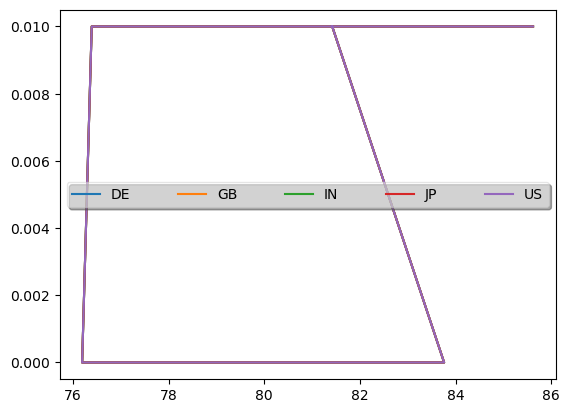

In [131]:
import matplotlib.pyplot as plt
import numpy as np


ax = plt.subplot(111)
t1 = np.arange(0.0, 1.0, 0.01)
for n in successSeverDF.index.tolist():
    plt.plot(successSeverDF.rate_success.values, successSeverDF.ci_success.values, label="{}".format(n))

leg = plt.legend(loc='best', ncol=len(successSeverDF.index.tolist()), mode="expand", shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.5)


plt.show()


In [125]:
# Present WoW table/graph with success rate and CI (see image below) per region
for row in successSeverDF:
    print(row)

successSeverDF.ci_success.values

#successSeverDF.plot(x='ci_success',y='rate_success',kind='line')

ci_success
rate_success
rate_sever
ci_sever


array([(0.82, 0.81), (0.84, 0.84), (0.76, 0.76), (0.77, 0.76),
       (0.86, 0.85)], dtype=object)

In [69]:
# Present WoW table/graph with success rate and CI (see image below) per region and rec type


In [70]:
# Present WoW table/graph with success rate and CI (see image below) per region and rec provider

Analysis Bonus questions:
1. Compute the per region success rate and CI in trailing weeks, Say, 4 weeks instead of 1 week - to allow for smoother estimations and smaller CIs

### Compactization

* Are there duplicated ads? To compac the data, remove duplicated ads and instead add an ad_count column **(pay attention, this is not trivial at all)**

### Merges and joins

The Wow samples and annotations task were sent and recieve seperatly, per each week. The dataset you were working on was constructed from those files. You can see the files under the `data/weekly` folder, here are the first 10 files:

In [71]:
import os
weekly_files = os.listdir('data/weekly/')
sorted(weekly_files)[:10]

FileNotFoundError: [Errno 2] No such file or directory: 'data/weekly/'

Your task is to reconstruct the dataset above. 

### Visualizations